## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read PredictIt Data Instead

In [2]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    df.columns = [symbol + ":" + name.lower() for name in df.columns]

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0


## Plot the closing prices for all the markets

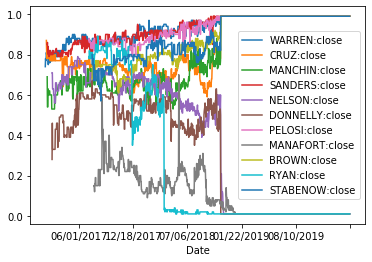

In [4]:
%matplotlib inline
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2020')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,0.77,0.77,0.78,0.78,...,0.82,0.82,0,0.0000,0.72,0.69,0.72,0.70,16,0.6981
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.70,0.70,45,0.7000
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.72,0.72,1,0.7200
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,0.78,0.78,0.78,0.78,...,0.82,0.81,120,0.8100,0.72,0.72,0.72,0.72,0,0.0000
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.78,0.78,0.78,0.78,...,0.87,0.81,52,0.8619,0.72,0.72,0.72,0.72,9,0.7200


## Define Exchanges

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

### Doing it without adding other features. Just use price 

In [8]:
#You still have to add "Streams" for all the standard columns open, high, low, close, volume in this case
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(subset_data[name])) for name in subset_data.columns]
    

In [9]:
#Then create the Feed from it
feed = DataFeed([predictit_ns])
feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [10]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## Environment

In [19]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [20]:
env.feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

#### ^An environment doesn't just show the OHLCV for each instrument. It also shows free, locked, total, as well as "USD_BTC"

## Using 123's Ray example

In [12]:
#Import tensortrade
import tensortrade

# Define Exchanges
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream


# Define External Data Feed (features)
import ta
from sklearn import preprocessing
from tensortrade.data import DataFeed, Module

# Portfolio
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio
from tensortrade.actions import ManagedRiskOrders
from gym.spaces import Discrete

# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):
        env = TradingEnvironment(
            feed=feed,
            portfolio=portfolio,
            use_internal=False,
            action_scheme="simple",
            reward_scheme="simple",
            window_size=15,
            enable_logger=False
        )        
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


ray.init(ignore_reinit_error=True, local_mode=True)
config = dqn.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 4
#config["num_envs_per_worker"] = 8
# config["eager"] = False

# config["timesteps_per_iteration"] = 100
# config["train_batch_size"] = 20
trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-03 13:50:38,014	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-03 13:50:38,018	ERROR logger.py:185 -- pip install 'ray[tune]' to see TensorBoard files.
2020-03-03 13:50:38,019	WARNING logger.py:287 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2020-03-03 13:50:38,025	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/li

{'num_workers': 4,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

In [18]:

for i in range(10):
    # Perform one iteration of training the policy with PPO
    print("Training iteration {}...".format(i))
    result = trainer.train()
    print("result: {}".format(result))
    
    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)

Training iteration 0...


/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



result: {'episode_reward_max': -0.07917777901814049, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': -0.07917777901814049, 'episode_len_mean': 231.0, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [-0.07917777901814049], 'episode_lengths': [231]}, 'sampler_perf': {'mean_env_wait_ms': 30.23118369664128, 'mean_processing_ms': 0.24301072825556216, 'mean_inference_ms': 1.3211781799557651}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 1.0, 1.0, 1.0, 1.0], 'num_target_updates': 1, 'num_steps_trained': 0, 'num_steps_sampled': 1008, 'sample_time_ms': 528.891, 'replay_time_ms': nan, 'grad_time_ms': nan, 'update_time_ms': 19.556, 'opt_peak_throughput': 0.0, 'opt_samples': nan, 'learner': {}}, 'timesteps_this_iter': 1008, 'done': False, 'timesteps_total': 1008, 'episodes_total': 1, 'training_iteration': 1, 'experiment_id': 'b003e5f53353495ebd520fe8ea71

result: {'episode_reward_max': 45.61448333452774, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 19.33637334561403, 'episode_len_mean': 456.6666666666667, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [12.473814481332498, -0.07917777901814049, 45.61448333452774], 'episode_lengths': [681, 231, 458]}, 'sampler_perf': {'mean_env_wait_ms': 31.350341314536976, 'mean_processing_ms': 0.23026087481920313, 'mean_inference_ms': 1.2758857940972443}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.901216, 0.901216, 0.901216, 0.901216], 'num_target_updates': 5, 'num_steps_trained': 4032, 'num_steps_sampled': 3024, 'sample_time_ms': 478.158, 'replay_time_ms': 3.194, 'grad_time_ms': 9.196, 'update_time_ms': 18.762, 'opt_peak_throughput': 3479.622, 'opt_samples': 32.0, 'learner': {'default_policy': {'cur_lr': 0.0005000000237487257, 'mean_q': 3.4352071, 'mi

result: {'episode_reward_max': 45.61448333452774, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 22.60597178773067, 'episode_len_mean': 546.4, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [23.729383185514305, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945], 'episode_lengths': [681, 231, 458, 681, 681]}, 'sampler_perf': {'mean_env_wait_ms': 31.33125047261321, 'mean_processing_ms': 0.2254412926131832, 'mean_inference_ms': 1.244663116644731}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.703648, 0.703648, 0.703648, 0.703648], 'num_target_updates': 9, 'num_steps_trained': 8064, 'num_steps_sampled': 5040, 'sample_time_ms': 438.652, 'replay_time_ms': 3.052, 'grad_time_ms': 8.891, 'update_time_ms': 18.735, 'opt_peak_throughput': 3599.112, 'opt_samples': 32.0, 'learner': {'default_policy': {'cur_lr': 0.0005000000

result: {'episode_reward_max': 76.54231491769683, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 35.56894147016873, 'episode_len_mean': 714.5714285714286, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [59.410416434830964, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945, 23.729383185514305, 76.54231491769683], 'episode_lengths': [1589, 231, 458, 681, 681, 681, 681]}, 'sampler_perf': {'mean_env_wait_ms': 30.959213321614467, 'mean_processing_ms': 0.21723636440480062, 'mean_inference_ms': 1.2279858777055712}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.50608, 0.50608, 0.50608, 0.50608], 'num_target_updates': 13, 'num_steps_trained': 12096, 'num_steps_sampled': 7056, 'sample_time_ms': 437.471, 'replay_time_ms': 3.038, 'grad_time_ms': 8.933, 'update_time_ms': 18.421, 'opt_peak_throughput': 3582.11, 'opt_samples

result: {'episode_reward_max': 76.54231491769683, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 35.41097296292293, 'episode_len_mean': 707.1111111111111, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [45.0912726410283, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945, 23.729383185514305, 76.54231491769683, 59.410416434830964, 24.62489373409698], 'episode_lengths': [681, 231, 458, 681, 681, 681, 681, 1589, 681]}, 'sampler_perf': {'mean_env_wait_ms': 30.81546680034927, 'mean_processing_ms': 0.21395863850195826, 'mean_inference_ms': 1.213424563871234}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.308512, 0.308512, 0.308512, 0.308512], 'num_target_updates': 17, 'num_steps_trained': 16128, 'num_steps_sampled': 9072, 'sample_time_ms': 431.928, 'replay_time_ms': 2.988, 'grad_time_ms': 9.175, 'update_time_ms': 18.

In [21]:
result['hist_stats']['episode_reward']

[76.87280873211759,
 14.216861343844199,
 -0.07917777901814049,
 45.61448333452774,
 12.473814481332498,
 31.291355716296945,
 23.729383185514305,
 76.54231491769683,
 59.410416434830964,
 24.62489373409698,
 45.0912726410283]

In [26]:
analysis = tune.run(
        "DQN",
        name = "DQN3",
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 2000,
        },
        config={
            "env": "ray_trading_env",
            "lr": grid_search([1e-4, 1e-6]),  # try different lrs
            "num_workers": 4,  # parallelism,

        },
    )

2020-03-03 14:43:48,530	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:43:48,534	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:43:48,536	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:43:48,544	ERROR logger.py:185 -- pip install 'ray[tune]' to see TensorBoard files.
2020-03-03 14:43:48,544	WARNING logger.py:287 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/gym/logger.py:30: U

Trial name,status,loc,lr
DQN_ray_trading_env_4d330450,RUNNING,,
DQN_ray_trading_env_4d334abe,PENDING,,


2020-03-03 14:44:25,980	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_4d330450:
  custom_metrics: {}
  date: 2020-03-03_14-44-25
  done: false
  episode_len_mean: 231.0
  episode_reward_max: -0.5530009009167086
  episode_reward_mean: -0.5530009009167086
  episode_reward_min: -0.5530009009167086
  episodes_this_iter: 1
  episodes_total: 1
  experiment_id: 6a00b3f960fe450e84b4fa7ffb5467f8
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 1
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 449.646
    update_time_ms: 19.324
  iterations_since_restore: 1
  node_ip: 172.27.234.225
  num_healthy_workers: 4
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 6.418181818181818
    ram_util_percent: 63.78863636363637
  pid: 25061
  policy_reward_max: {}
  policy_reward_mean: 

2020-03-03 14:44:56,950	WARNING util.py:132 -- The `process_trial` operation took 30.96842312812805 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_4d330450,RUNNING,172.27.234.225:25061,0.0001,-0.553001,30.8756,1008,1
DQN_ray_trading_env_4d334abe,PENDING,,,,,,


2020-03-03 14:44:56,956	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:44:56,957	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.
2020-03-03 14:44:56,989	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:44:56,999	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:44:57,001	ERROR logger.py:185 -- pip install 'ray[tune]' to see Tenso

Result for DQN_ray_trading_env_4d330450:
  custom_metrics: {}
  date: 2020-03-03_14-44-56
  done: true
  episode_len_mean: 344.5
  episode_reward_max: -0.5530009009167086
  episode_reward_mean: -0.7239306906312588
  episode_reward_min: -0.8948604803458091
  episodes_this_iter: 1
  episodes_total: 2
  experiment_id: 6a00b3f960fe450e84b4fa7ffb5467f8
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 9.74
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 3.3901498317718506
        mean_q: 1.807096242904663
        mean_td_error: -0.3827977776527405
        min_q: 0.22518354654312134
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 2016
    num_target_updates: 3
    opt_peak_throughput: 3285.286
    opt_samples: 32.0
    replay_time_ms: 3.016
    sample_time_ms: 442.769
    update_time_ms: 18.471
  iterations_since_restore

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/ray/rllib/utils/from_c

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_4d330450,TERMINATED,,0.0001,-0.723931,61.833,2016,2
DQN_ray_trading_env_4d334abe,RUNNING,,,,,,


2020-03-03 14:45:34,010	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.41 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_4d334abe:
  custom_metrics: {}
  date: 2020-03-03_14-45-33
  done: false
  episode_len_mean: 231.0
  episode_reward_max: -0.2932560148190395
  episode_reward_mean: -0.2932560148190395
  episode_reward_min: -0.2932560148190395
  episodes_this_iter: 1
  episodes_total: 1
  experiment_id: 7f53a32bf4874c71af40bbee305dcb0b
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 1
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 484.83
    update_time_ms: 19.32
  iterations_since_restore: 1
  node_ip: 172.27.234.225
  num_healthy_workers: 4
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 6.170454545454546
    ram_util_percent: 64.23409090909091
  pid: 25061
  policy_reward_max: {}
  policy_reward_mean: {}


2020-03-03 14:46:06,842	WARNING util.py:132 -- The `process_trial` operation took 32.830424785614014 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_4d330450,TERMINATED,,0.0001,-0.723931,61.833,2016,2
DQN_ray_trading_env_4d334abe,RUNNING,172.27.234.225:25061,1e-06,-0.293256,30.8312,1008,1


2020-03-03 14:46:06,855	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 14:46:06,855	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.
2020-03-03 14:46:06,896	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_4d334abe:
  custom_metrics: {}
  date: 2020-03-03_14-46-06
  done: true
  episode_len_mean: 344.5
  episode_reward_max: -0.2932560148190395
  episode_reward_mean: -0.39162078755623536
  episode_reward_min: -0.4899855602934312
  episodes_this_iter: 1
  episodes_total: 2
  experiment_id: 7f53a32bf4874c71af40bbee305dcb0b
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 9.765
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 1.4546284675598145
        mean_q: 0.4246731400489807
        mean_td_error: -0.9989801645278931
        min_q: -1.3783903121948242
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 2016
    num_target_updates: 3
    opt_peak_throughput: 3276.944
    opt_samples: 32.0
    replay_time_ms: 3.208
    sample_time_ms: 485.881
    update_time_ms: 19.709
  iterations_since_resto

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_4d330450,TERMINATED,,0.0001,-0.723931,61.833,2016,2
DQN_ray_trading_env_4d334abe,TERMINATED,,1e-06,-0.391621,63.6481,2016,2


2020-03-03 14:46:06,928	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


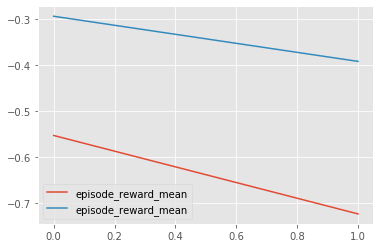

In [27]:
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent

In [ ]:
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
print(logdir)
trainer.restore(os.path.join(logdir, "checkpoint_2/checkpoint-2"))

## Testing

In [34]:
for episode_num in range(1):
    state = env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    
    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

ValueError: ('Observation outside expected value range', Box(15, 66), array([[0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+04, 0.0e+00, 0.0e+00, ..., 8.5e-01, 8.5e-01, 0.0e+00]]))

## Plot

In [15]:
%matplotlib inline

portfolio.performance.plot()

AttributeError: 'NoneType' object has no attribute 'plot'

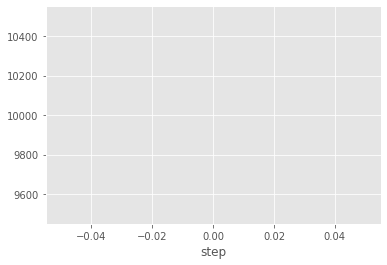

In [48]:
portfolio.performance.net_worth.plot()

In [36]:
portfolio.performance.head()

,predictit:/MANCHIN:open,predictit:/MANCHIN:low,predictit:/MANCHIN:high,predictit:/MANCHIN:close,predictit:/MANCHIN:volume,predictit:/MANCHIN:average,predictit:/SANDERS:open,predictit:/SANDERS:low,predictit:/SANDERS:high,predictit:/SANDERS:close,...,predictit:/RYAN:/free,predictit:/RYAN:/locked,predictit:/RYAN:/total,predictit:/RYAN:/worth,predictit:/STABENOW:/free,predictit:/STABENOW:/locked,predictit:/STABENOW:/total,predictit:/STABENOW:/worth,net_worth,base_symbol
step,,,,,,,,,,,,,,,,,,,,,
0,0.68,0.68,0.71,0.71,185,0.6804,0.85,0.85,0.85,0.85,...,0,0,0,0.0,0,0,0,0.0,10000.0,USD
0,0.68,0.68,0.71,0.71,185,0.6804,0.85,0.85,0.85,0.85,...,0,0,0,0.0,0,0,0,0.0,10000.0,USD


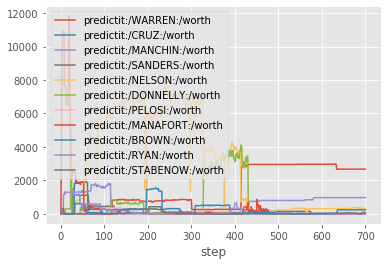

In [37]:
#Plot the total balance in each type of item
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]
weights.iloc[:, :].plot()


## Try Plotly Render too

In [ ]:
from tensortrade.environments.render import PlotlyTradingChart
from tensortrade.environments.render import FileLogger

chart_renderer = PlotlyTradingChart(
    height = 800
)

file_logger = FileLogger(
    filename='example.log',  # omit or None for automatic file name
    path='training_logs'  # create a new directory if doesn't exist, None for no directory
)

In [ ]:
price_history.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

In [ ]:
env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='managed-risk',
    reward_scheme='risk-adjusted',
    window_size=20,
    price_history=price_history,
    renderers = [chart_renderer, file_logger]
)

In [ ]:
from tensortrade.agents import DQNAgent

agent = DQNAgent(env)
agent.train(n_episodes=1, n_steps=1000, render_interval=1)

## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)